In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv("q3.csv") 
data.tail()

,Tree species,TreeHeight_foot,TreeCrown_foot,TreeDBH_cm
195,Orange,10,7.0,10.509554
196,Orange,10,7.0,8.917197
197,Orange,9,6.0,10.509554
198,Orange,10,6.0,13.694268
199,Orange,7,4.0,8.917197


In [37]:
# Separate features and target variable
X = data[['Tree species', 'TreeHeight_foot', 'TreeCrown_foot']]
y = data['TreeDBH_cm']


In [38]:
# One-hot encode the categorical feature (Tree species)
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
species_encoded = encoder.fit_transform(X[['Tree species']])
species_encoded_df = pd.DataFrame(species_encoded, columns=encoder.get_feature_names_out(['Tree species']))

In [39]:
# Combine the encoded features with the rest of the dataset
X = pd.concat([species_encoded_df, X[['TreeHeight_foot', 'TreeCrown_foot']]], axis=1)

In [40]:
scaler = StandardScaler()
X[['TreeHeight_foot', 'TreeCrown_foot']] = scaler.fit_transform(X[['TreeHeight_foot', 'TreeCrown_foot']])

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [43]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [44]:
# Make predictions
y_pred = model.predict(X_test)

In [49]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Root Mean Squared Error: 3.5516340259007015
Mean Squared Error: 12.614104253935626
R-squared: 0.4104417588925673


In [50]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature Importances:")
print(feature_importances.sort_values(ascending=False))

Feature Importances:
TreeHeight_foot               0.470923
TreeCrown_foot                0.365670
Tree species_Mango            0.123857
Tree species_Lemon            0.016968
Tree species_Orange           0.015600
Tree species_Custard apple    0.006982
dtype: float64


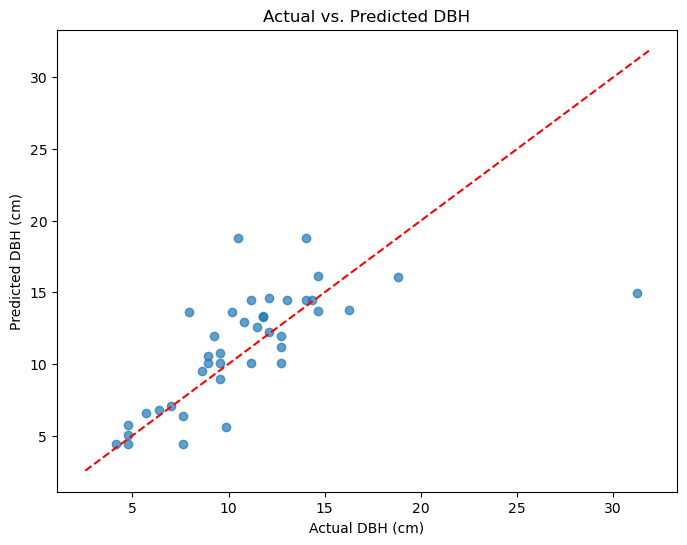

In [53]:
# Plotting Predicted vs. Actual values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot( [y.min(), y.max()], [y.min(), y.max()], 'r--' ) # Ideal line
plt.xlabel("Actual DBH (cm)")
plt.ylabel("Predicted DBH (cm)")
plt.title("Actual vs. Predicted DBH")
plt.show()